In [ ]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = 'E:/Alibaba German AI Challenge/origin_DATA/validation.h5'
f = h5py.File(filename,'r')
s1 = f['sen1']
s2 = f['sen2']
label = f['label']

plt.subplot(121)
plt.imshow(s1[0,:,:,4],cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-1')

plt.subplot(122)
plt.imshow(s2[0,:,:,1],cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-2')

plt.show()

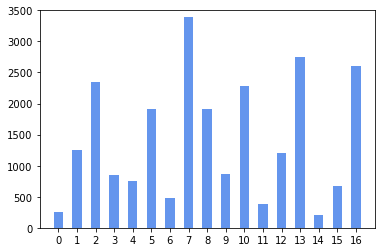

In [18]:
#计算个label样本的个数
label_qty = np.sum(label, axis=0)
x = list(range(17))
plt.bar(x, label_qty, width= 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
plt.ylim((0, 3500))
plt.show()

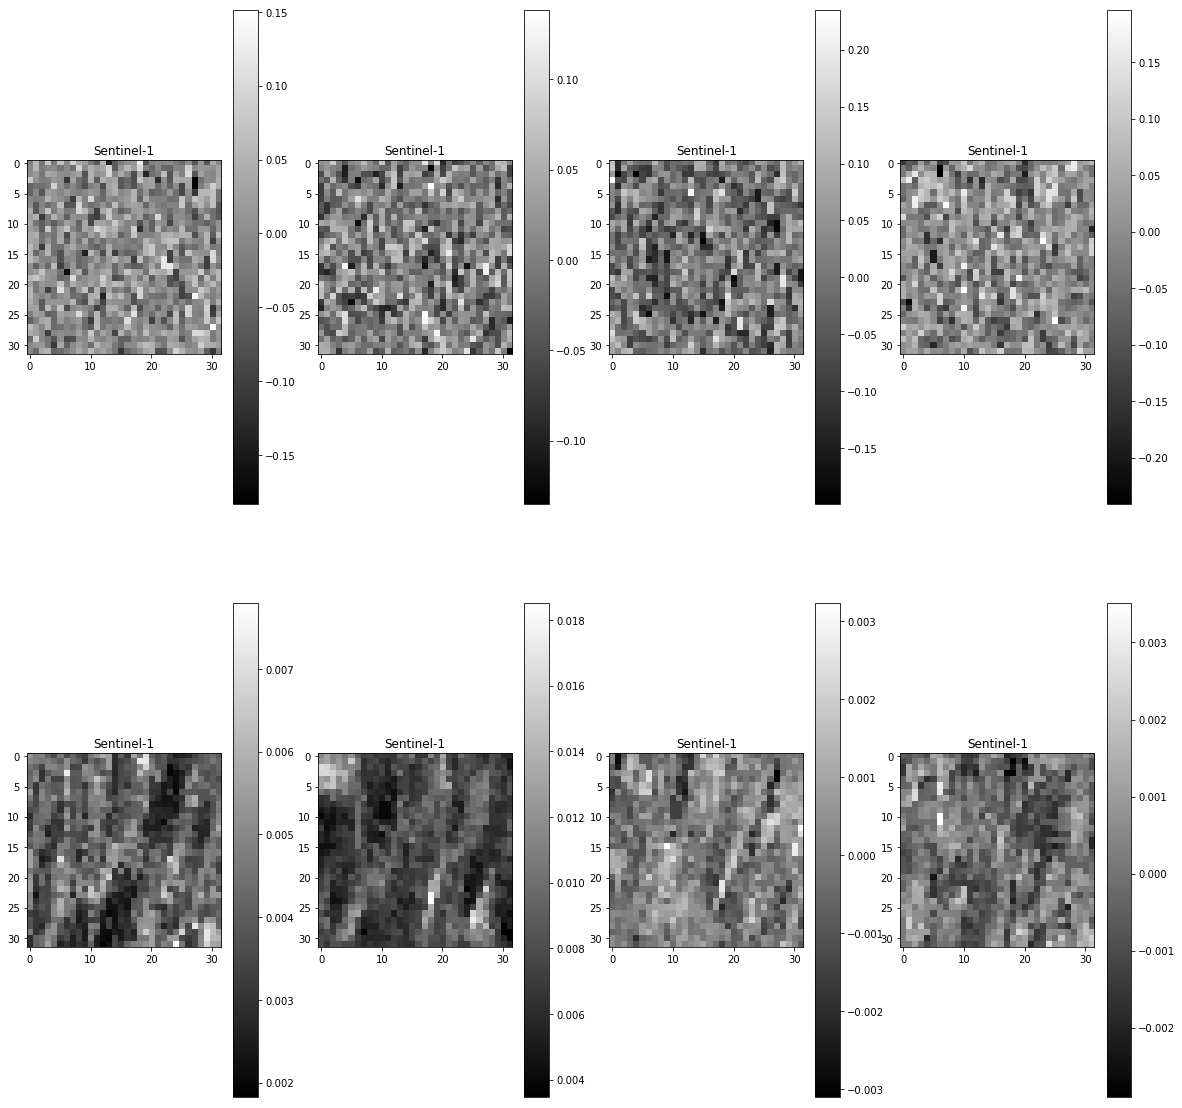

In [2]:
#将s1中8个通道全部展示，一行4个
plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(s1[0,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-1')
plt.show()

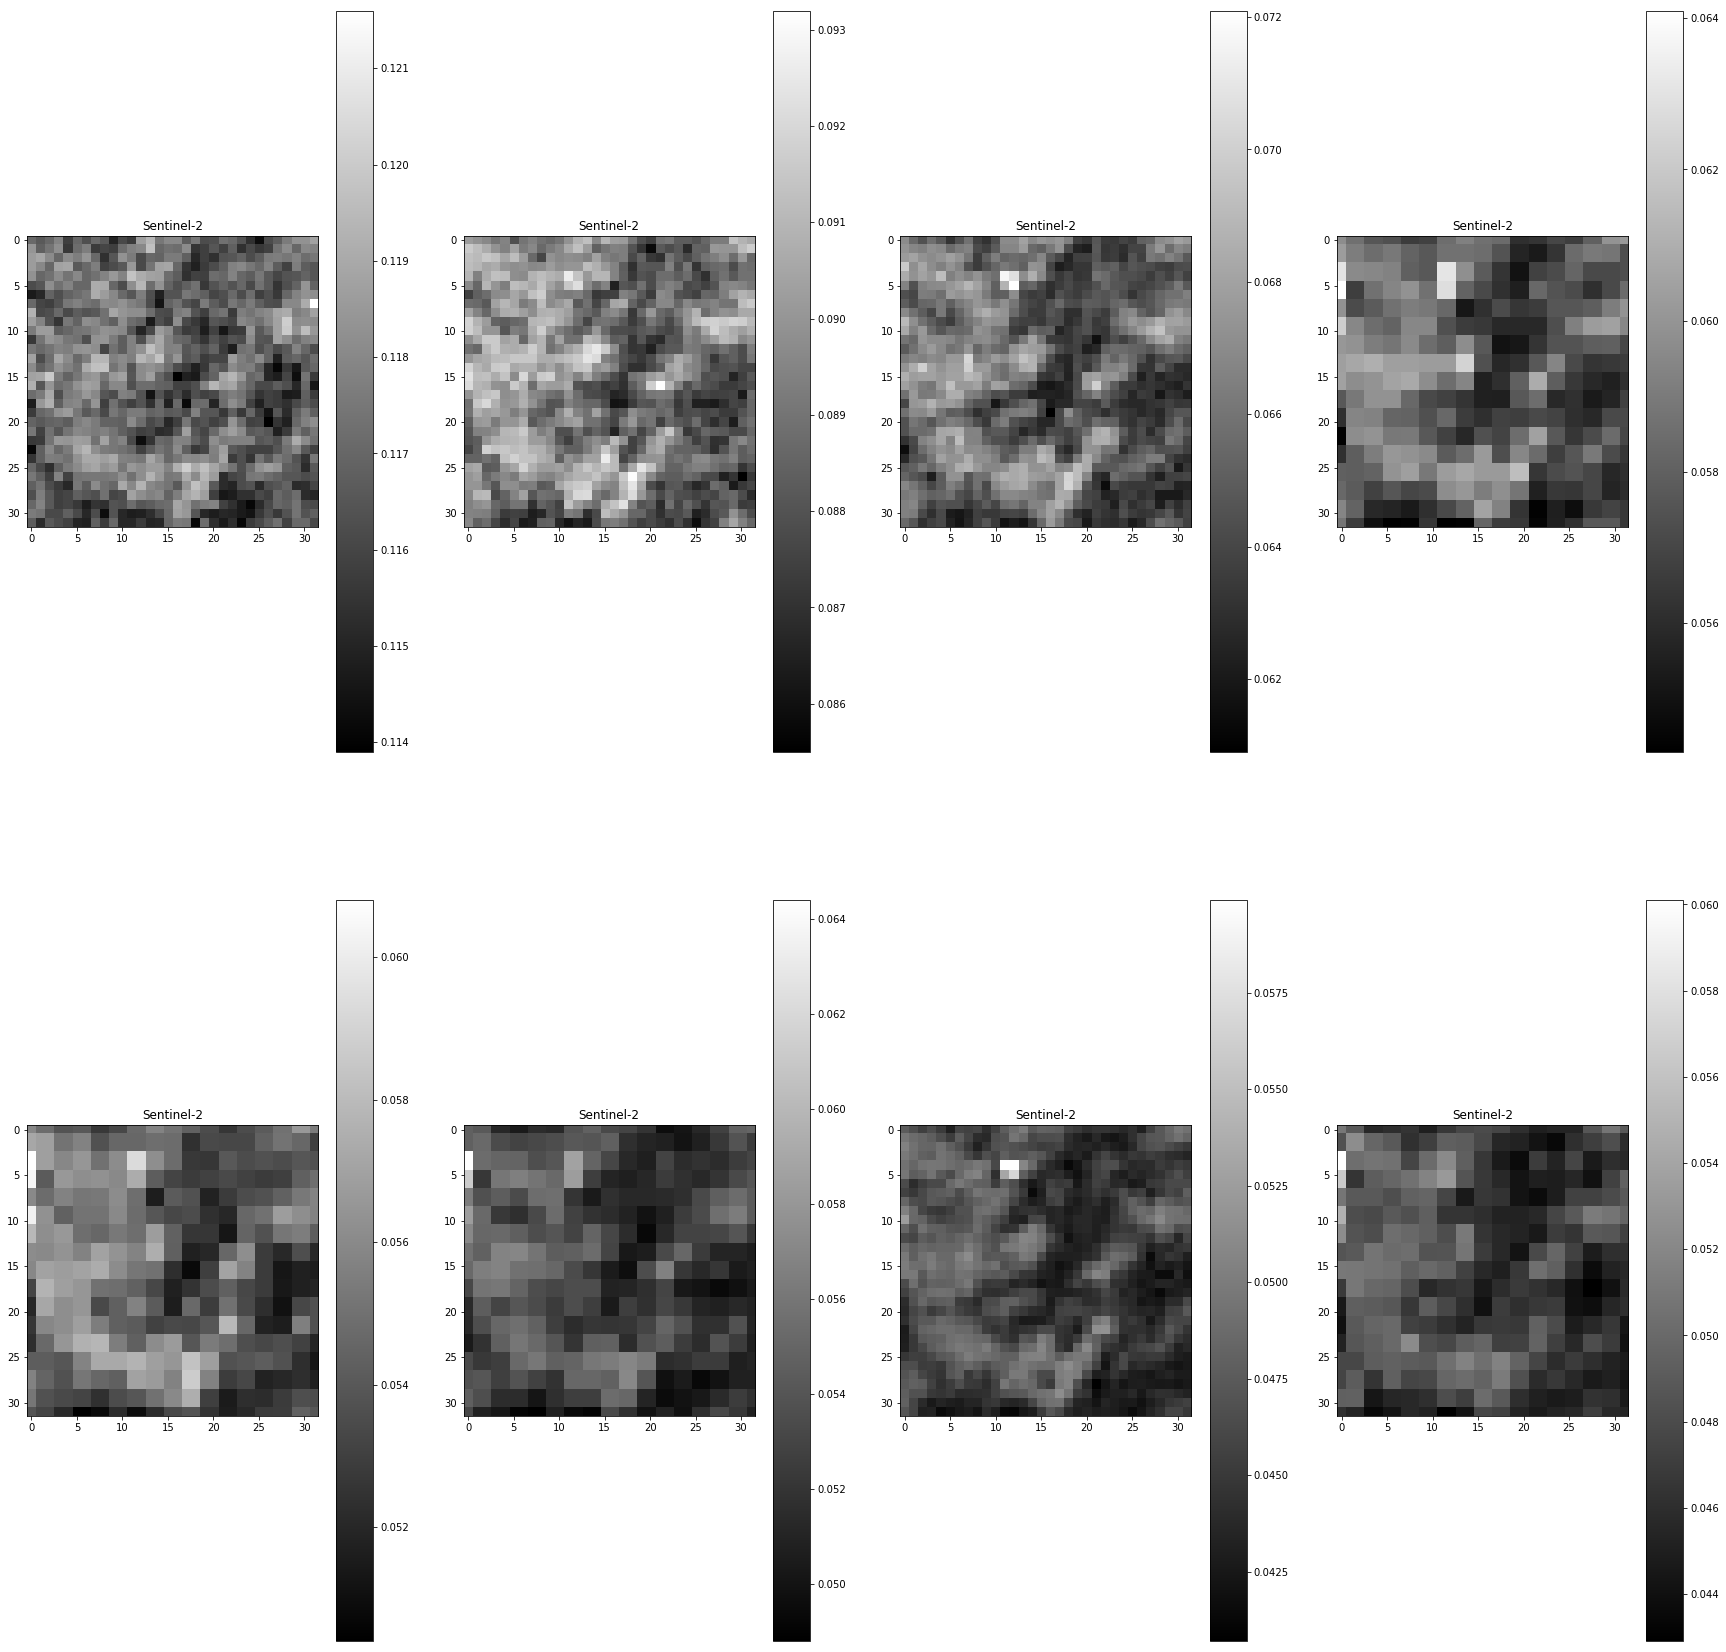

In [6]:
#将s2中10个通道全部展示，一行5个
plt.figure(figsize = (30,30))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(s2[0,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2')
plt.show()

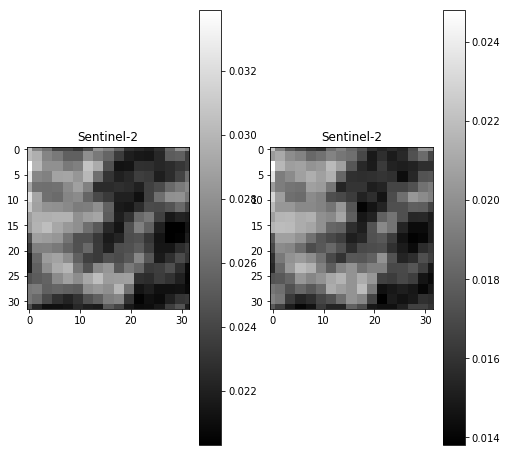

In [10]:
plt.figure(figsize = (8,8))
for i in range(8,10):
    j = i-8
    plt.subplot(121+j)
    plt.imshow(s2[0,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2')
plt.show()

##### 观察train数据和validation数据的label分布

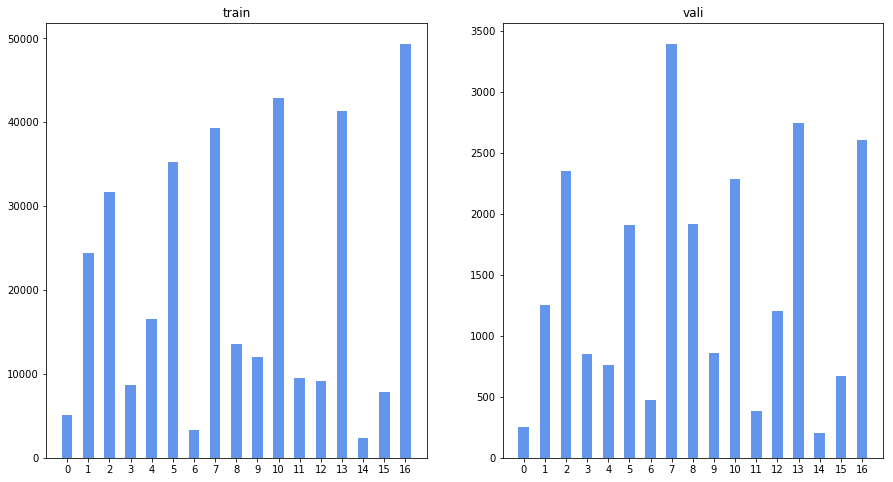

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename_train = 'E:/Alibaba German AI Challenge/origin_DATA/training.h5'
f = h5py.File(filename_train,'r')

s1_train = f['sen1']
s2_train = f['sen2']
label_train = f['label']

filename_vali = 'E:/Alibaba German AI Challenge/origin_DATA/validation.h5'
f = h5py.File(filename_vali,'r')
s1_vali = f['sen1']
s2_vali = f['sen2']
label_vali = f['label']


plt.figure(figsize = (15,8))
#计算trainDATA各个label样本的个数
sum_train = np.sum(label_train, axis=0)
x = list(range(17))
plt.subplot(121)
plt.bar(x, sum_train, width= 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.title('train')


#计算valiDATA各个label样本的个数
sum_vali = np.sum(label_vali, axis=0)
x = list(range(17))
plt.subplot(122)
plt.bar(x, sum_vali, width= 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.title('vali')
plt.show()

In [14]:
sum_train[14] + sum_vali[14]

2594.0

In [15]:
sum_train[6] + sum_vali[6]

3743.0

In [16]:
sum_train[0] + sum_vali[0]

5324.0

##### 从train数据中取除部分数据使label分布更加均衡，形成最终训练集

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename_train = 'E:/Alibaba German AI Challenge/origin_DATA/training.h5'
f = h5py.File(filename_train,'r')

s1_train = f['sen1']
s2_train = f['sen2']
label_train = f['label']

filename_vali = 'E:/Alibaba German AI Challenge/origin_DATA/validation.h5'
f = h5py.File(filename_vali,'r')
s1_vali = f['sen1']
s2_vali = f['sen2']
label_vali = f['label']

sum_train = np.sum(label_train, axis=0)
sum_vali = np.sum(label_vali, axis=0)

count = []
num = 3000
for i in range(label_train.shape[1]):
    if sum_vali[i] >= num:
        count.append(0)
    else:
        min_num = min(num,sum_train[i]+sum_vali[i])
        count.append(min_num-sum_vali[i])
#每一类需要增加的样本数量
count = np.array(count)
count = count.astype(np.int32)
count

array([2744, 1746,  647, 2151, 2243, 1094, 2526,    0, 1086, 2140,  713,
       2618, 1798,  253, 2392, 2328,  391])

In [2]:
sum(count)

26870

In [3]:
#取得待取样本在trainDATA中的索引
didgit_label = np.argmax(label_train, 1)

ID = []
for index in range(17):
    c = 0
    for i in range(didgit_label.shape[0]):
        if c == count[index]:
            break
        if(didgit_label[i] == index):
            ID.append(i)
            c += 1
len(ID)    

26870

In [4]:
ID = sorted(ID)
ID

[0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 20

In [5]:
#add_1 = s1_train[ID]
#add_2 = s2_train[ID]
add_label = label_train[ID,:]

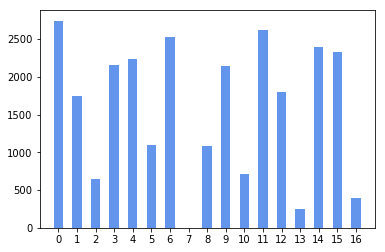

In [6]:
xx = list(range(17))
sum_add_label = np.sum(add_label,axis = 0)
plt.bar(xx, sum_add_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

In [7]:
add_1 = s1_train[ID]
add_2 = s2_train[ID]

In [8]:
add_1 = np.array(add_1)
add_2 = np.array(add_2)
y = np.array(add_label)

x = []
for i in range(0,add_1.shape[0]):
    temp1 = add_1[i].flatten()
    temp2 = add_2[i].flatten()
    temp = np.hstack((temp1,temp2))
    x.append(temp)
x = np.array(x)

add_data = np.hstack((x,y))
add_data.shape

(26870, 18449)

In [9]:
np.save("add_data.npy",add_data)

In [1]:
import numpy as np
import h5py

filename = 'E:/Alibaba German AI Challenge/origin_DATA/validation.h5'
f = h5py.File(filename,'r')
print('Get the h5 file')

s1 = np.array(f['sen1'])
s2 = np.array(f['sen2'])
y = np.array(f['label'])

x = []
for i in range(0,s1.shape[0]):
    temp1 = s1[i].flatten()
    temp2 = s2[i].flatten()
    temp = np.hstack((temp1,temp2))
    x.append(temp)
x = np.array(x)

data = np.hstack((x,y))
data.shape

Get the h5 file


(24119, 18449)

In [2]:
np.save('vali_data.npy',data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

vali_data = np.load('vali_data.npy')
add_data = np.load('add_data.npy')

data = np.vstack((vali_data,add_data))

data.shape

(50989, 18449)

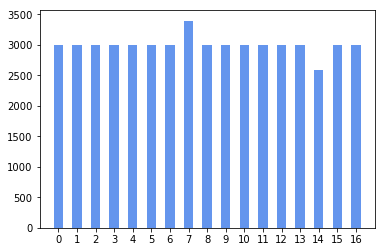

In [3]:
xx = list(range(17))
label = data[:,-17:]
sum_label = np.sum(label,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

In [4]:
np.save('data.npy',data)

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

filename_train = 'E:/Alibaba German AI Challenge/origin_DATA/training.h5'
f = h5py.File(filename_train,'r')

s1 = f['sen1']
s2 = f['sen2']
label = f['label']

#从trainDATA中随机取5000个作为validation
rd = np.random.permutation(label.shape[0])
rd_sample = rd[:10000]

rd_sample = sorted(rd_sample)
rd_sample

[90,
 111,
 122,
 164,
 175,
 201,
 217,
 295,
 361,
 366,
 379,
 565,
 599,
 617,
 721,
 778,
 792,
 818,
 835,
 838,
 874,
 886,
 894,
 902,
 906,
 920,
 935,
 970,
 988,
 1007,
 1055,
 1073,
 1078,
 1094,
 1096,
 1110,
 1144,
 1215,
 1261,
 1262,
 1337,
 1350,
 1355,
 1445,
 1504,
 1568,
 1627,
 1723,
 1755,
 1786,
 1845,
 1850,
 1860,
 1911,
 1935,
 1949,
 1978,
 2048,
 2051,
 2134,
 2160,
 2197,
 2198,
 2214,
 2238,
 2257,
 2267,
 2323,
 2351,
 2470,
 2486,
 2516,
 2527,
 2583,
 2602,
 2735,
 2739,
 2770,
 2777,
 2821,
 2857,
 2895,
 2912,
 2940,
 2945,
 2992,
 3031,
 3087,
 3090,
 3132,
 3133,
 3157,
 3234,
 3235,
 3277,
 3335,
 3404,
 3504,
 3542,
 3589,
 3620,
 3644,
 3659,
 3673,
 3714,
 3853,
 3911,
 3926,
 3937,
 3950,
 4055,
 4112,
 4139,
 4160,
 4186,
 4190,
 4251,
 4306,
 4324,
 4337,
 4360,
 4362,
 4393,
 4401,
 4475,
 4484,
 4512,
 4612,
 4679,
 4715,
 4845,
 4849,
 4871,
 4946,
 4998,
 5021,
 5024,
 5049,
 5064,
 5073,
 5083,
 5092,
 5149,
 5154,
 5195,
 5202,
 5248,
 

In [2]:
sample_s1 = np.array(s1[rd_sample])
sample_s2 = np.array(s2[rd_sample])
sample_label = np.array(label[rd_sample])

x = []
for i in range(0,sample_s1.shape[0]):
    temp1 = sample_s1[i].flatten()
    temp2 = sample_s2[i].flatten()
    temp = np.hstack((temp1,temp2))
    x.append(temp)
x = np.array(x)

vali = np.hstack((x,sample_label))
vali.shape

(10000, 18449)

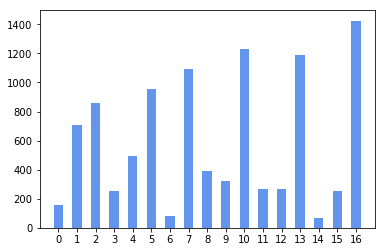

In [3]:
xx = list(range(17))
label = vali[:,-17:]
sum_label = np.sum(label,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

In [4]:
np.save('sample_of_training_10k.npy',vali)

##### 测试从vali_data.npy中取batch标签的分布情况

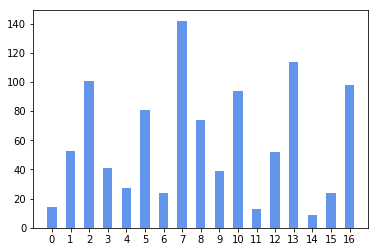

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

filename = 'E:/Alibaba German AI Challenge/data_process/vali_data.npy'
data = np.load(filename)

batch_size = 1000
sample = random.sample(list(range(0,data.shape[0])),batch_size)
sample = sorted(sample)

batch = data[sample,:]

x = batch[:,:-17]
y = batch[:,-17:]

xx = list(range(17))
sum_label = np.sum(y,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

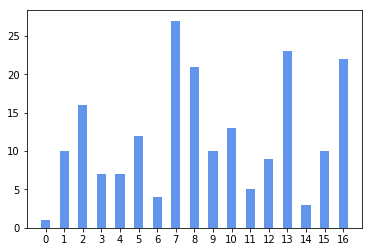

In [2]:
batch_size = 200
sample = random.sample(list(range(0,data.shape[0])),batch_size)
sample = sorted(sample)

batch = data[sample,:]

x = batch[:,:-17]
y = batch[:,-17:]

xx = list(range(17))
sum_label = np.sum(y,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

##### 测试从data.npy中取batch标签的分布情况

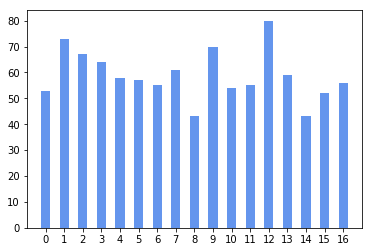

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

filename = 'E:/Alibaba German AI Challenge/data_process/data.npy'
data = np.load(filename)

batch_size = 1000
sample = random.sample(list(range(0,data.shape[0])),batch_size)
sample = sorted(sample)

batch = data[sample,:]

x = batch[:,:-17]
y = batch[:,-17:]

xx = list(range(17))
sum_label = np.sum(y,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

##### 打乱顺序之后对data.npy进行随机取样，分析其label分布

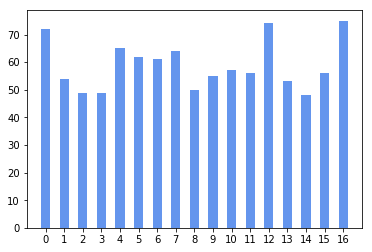

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

filename = 'E:/Alibaba German AI Challenge/data_process/data.npy'
data = np.load(filename)

data_shuffle = np.zeros(data.shape)
rand = list(range(0,data.shape[0]))
random.shuffle(rand)
for i in range(data.shape[0]):
    data_shuffle[i] = data[rand[i]]


batch_size = 1000
sample = random.sample(list(range(0,data.shape[0])),batch_size)
sample = sorted(sample)

batch = data_shuffle[sample,:]

x = batch[:,:-17]
y = batch[:,-17:]

xx = list(range(17))
sum_label = np.sum(y,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

In [8]:
np.save('data_shuffle.npy',data_shuffle)

In [1]:
import numpy as np
data = np.load('E:/Alibaba German AI Challenge/data_process/data_shuffle.npy')

data.shape

(50989, 18449)

In [9]:
np.mean(data,0).max()

0.67255901005176988

In [10]:
np.mean(data,0).min()

-0.10297269559494286

In [11]:
np.std(data,0).max()

57.519368487733949

In [12]:
np.std(data,0).min()

0.038958527552355252

In [13]:
data.max()

12702.134765625

In [14]:
data.min()

-5006.98095703125

In [19]:
np.array([[[1,2],[3,4]],[[5,6],[7,8]],[[9,0],[11,12]]]).flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,  0, 11, 12])

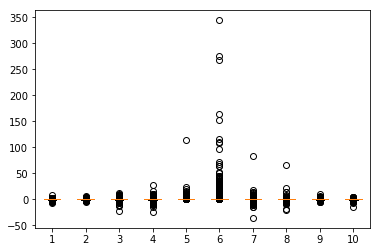

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(x=data[:,320:330],whis=1.5)
plt.show()

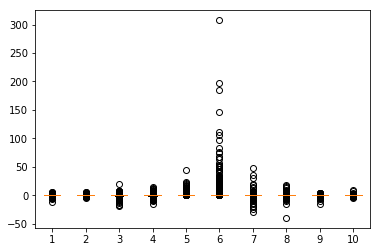

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(x=data[:,0:10],whis=1.5)
plt.show()

##### 对数据按通道进行归一化
+ scaled_x = (x-min)/(max-min)
+ 其中max、min分别是该像素所在通道的最大值最小值

In [1]:
import numpy as np
data = np.load('E:/Alibaba German AI Challenge/data_process/data_shuffle.npy')

data.shape

(50989, 18449)

In [2]:
x = data[:,:-17]
y = data[:,-17:]

# 一个通道对应的列数
pix_num_channel = 32*32

for i in range(18):
    temp = x[:,i*pix_num_channel:(i+1)*pix_num_channel]
    temp_max = temp.max()
    temp_min = temp.min()
    if temp_max == temp_min:
        base = 1
    else:
         base = temp_max-temp_min
    for row in range(data.shape[0]):
        for col in range(i*pix_num_channel,(i+1)*pix_num_channel):
            data[row][col] = (data[row][col]-temp_min)/base
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [5]:
data[:,:32*32].min()

0.0

In [6]:
data.shape

(50989, 18449)

In [7]:
np.save('data_shuffle_scaled.npy',data)

##### 重新生成只有s2信道的shuffle数据集

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = 'E:/Alibaba German AI Challenge/origin_DATA/validation.h5'
f = h5py.File(filename,'r')
s1 = f['sen1']
s2 = f['sen2']
label = f['label']


In [2]:
ss = np.array(s2)

data = []

for i in range(0,ss.shape[0]):
    temp = ss[i].flatten()
    data.append(temp)
    
data = np.array(data)

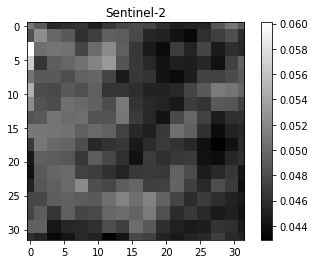

In [3]:
sample = data[0].reshape((32,32,10))
sample_ = sample[:,:,7].reshape((32,32))

plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-2')
plt.show()

In [2]:
data.shape

NameError: name 'data' is not defined

In [7]:
np.save('s2_vali_no_label.npy', data)

##### 将validation的label存入csv

In [3]:
label = np.array(label)
label.shape

(24119, 17)

In [4]:
np.save('s2_vali_label_one_hot.npy',label)

##### 向vali文件中添加数据使其label均衡

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename_train = 'E:/Alibaba German AI Challenge/origin_DATA/training.h5'
f = h5py.File(filename_train,'r')

s1_train = f['sen1']
s2_train = f['sen2']
label_train = f['label']

filename_vali = 'E:/Alibaba German AI Challenge/origin_DATA/validation.h5'
f = h5py.File(filename_vali,'r')
s1_vali = f['sen1']
s2_vali = f['sen2']
label_vali = f['label']

sum_train = np.sum(label_train, axis=0)
sum_vali = np.sum(label_vali, axis=0)

count = []
num = 3000
for i in range(label_train.shape[1]):
    if sum_vali[i] >= num:
        count.append(0)
    else:
        min_num = min(num,sum_train[i]+sum_vali[i])
        count.append(min_num-sum_vali[i])
#每一类需要增加的样本数量
count = np.array(count)
count = count.astype(np.int32)
count

array([2744, 1746,  647, 2151, 2243, 1094, 2526,    0, 1086, 2140,  713,
       2618, 1798,  253, 2392, 2328,  391])

In [2]:
#取得待取样本在trainDATA中的索引
didgit_label = np.argmax(label_train, 1)

ID = []
for index in range(17):
    c = 0
    for i in range(didgit_label.shape[0]):
        if c == count[index]:
            break
        if(didgit_label[i] == index):
            ID.append(i)
            c += 1
len(ID)    

26870

In [3]:
ID = sorted(ID)

add = s2_train[ID]
label = label_train[ID]

add.shape,label.shape

((26870, 32, 32, 10), (26870, 17))

In [4]:
add = np.array(add)
label = np.array(label)

x = []
for i in range(0,add.shape[0]):
    temp = add[i].flatten()
    x.append(temp)
x = np.array(x)

x.shape

(26870, 10240)

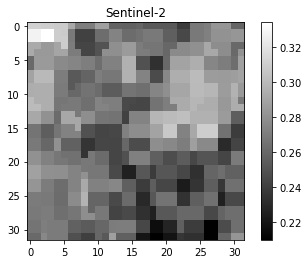

In [6]:
sample = x[0].reshape((32,32,10))
sample_ = sample[:,:,7].reshape((32,32))

plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-2')
plt.show()

In [7]:
np.save('s2_add_no_label.npy',x)

In [5]:
np.save('s2_add_label_one_hot.npy',label)

##### 整合两部分数据和label，并且打乱数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

vali_name = 's2_vali_no_label.npy'
add_name = 's2_add_no_label.npy'

vali_label_name = 's2_vali_label_one_hot.npy'
add_label_name = 's2_add_label_one_hot.npy'

vali = np.load(vali_name)
add = np.load(add_name)



vali_label = np.load(vali_label_name)
add_label = np.load(add_label_name)

data = np.vstack((vali,add))
label = np.vstack((vali_label,add_label))


NameError: name 'shape' is not defined

In [2]:
data.shape,label.shape

((50989, 10240), (50989, 17))

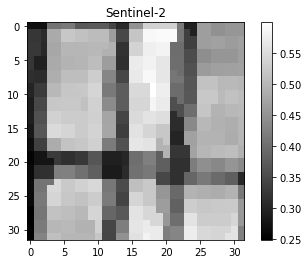

In [4]:
sample = data[7].reshape((32,32,10))
sample_ = sample[:,:,7].reshape((32,32))

plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-2')
plt.show()

In [5]:
np.save('s2_data_no_label.npy',data)
np.save('s2_label_one_hot.npy',label)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

data = np.load('s2_data_no_label.npy')
label = np.load('s2_label_one_hot.npy')

data_label = np.hstack((data,label))

data_shuffle = np.zeros(data_label.shape)
rand = list(range(0,data_label.shape[0]))
random.shuffle(rand)
data_shuffle = np.zeros(data_label.shape)
for i in range(data_label.shape[0]):
    data_shuffle[i] = data_label[rand[i]]
    
data_shuffle.shape

(50989, 10257)

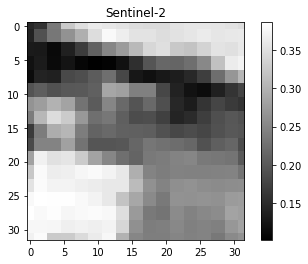

In [3]:
sample = data_shuffle[7,:-17].reshape((32,32,10))
sample_ = sample[:,:,7].reshape((32,32))

plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-2')
plt.show()

In [4]:
np.save('s2_data_shuffle.npy',data_shuffle)

##### 观察打乱之后的label分布

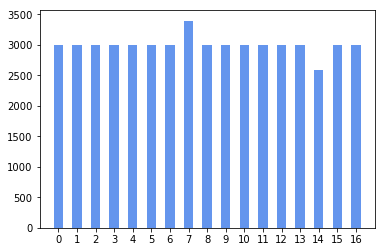

In [5]:
label_shuffle = data_shuffle[:,-17:]

xx = list(range(17))
sum_label = np.sum(label_shuffle,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

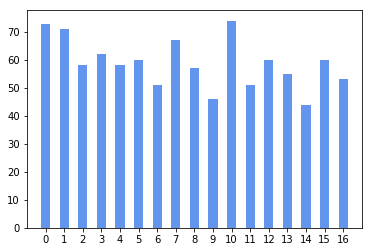

In [6]:
batch_size = 1000
sample = random.sample(list(range(0,data.shape[0])),batch_size)
sample = sorted(sample)

batch = data_shuffle[sample,:]

x = batch[:,:-17]
y = batch[:,-17:]

xx = list(range(17))
sum_label = np.sum(y,axis = 0)
plt.bar(xx, sum_label,width = 0.5, color = "cornflowerblue")
my_x_ticks = np.arange(0, 17, 1)
#my_y_ticks = np.arange(0, 4000, 500)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)
plt.xlim((-1, 17))
#plt.ylim((0, 3500))
plt.show()

##### 尝试预处理s2信道数据，用滤波器进行锐化处理(线性插值等)

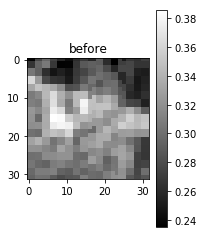

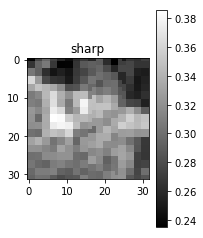

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data = np.load('E:/Alibaba German AI Challenge/data_process/s2/s2_data_shuffle.npy')
sample = data[0,:-17]
sample = sample.reshape((32,32,10))
sample_ = sample[:,:,7].reshape((32,32))

plt.subplot(121)
plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('before')
plt.show()

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(sample_, -1, kernel=kernel) 

plt.subplot(122)
plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('sharp')
plt.show()

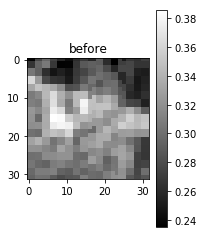

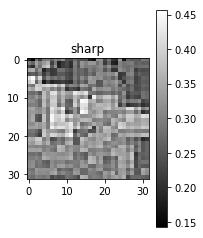

In [4]:
plt.subplot(121)
plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('before')
plt.show()

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(sample_, -1, kernel=kernel) 

plt.subplot(122)
plt.imshow(dst,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('sharp')
plt.show()

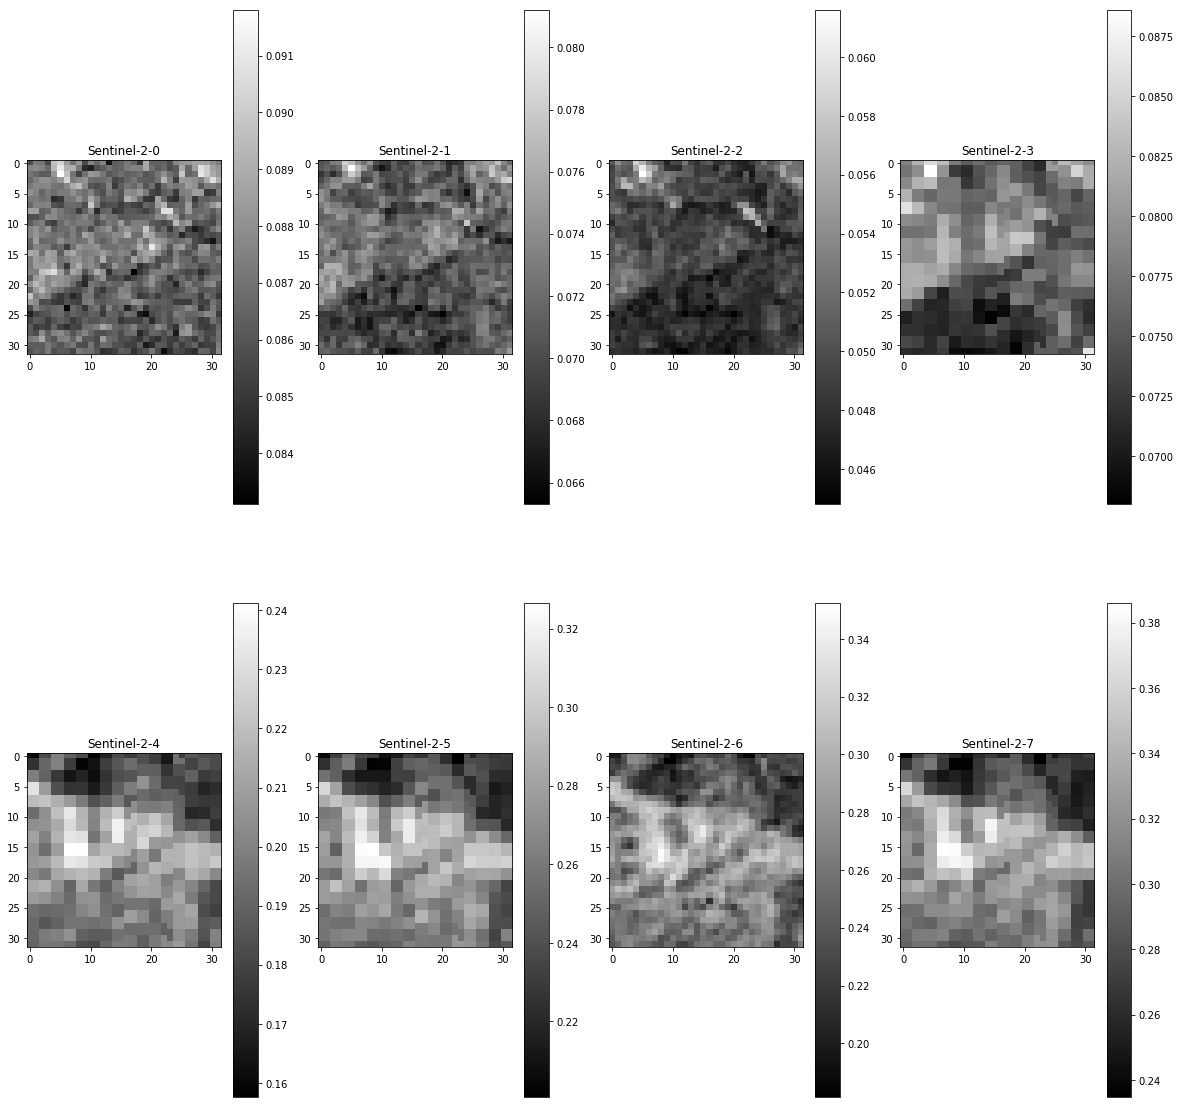

In [6]:
plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

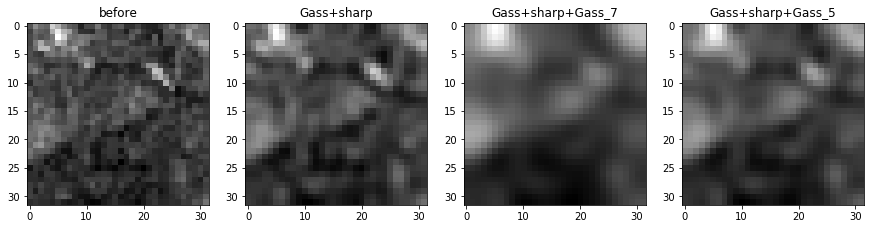

In [67]:
sample_ = sample[:,:,2].reshape((32,32))
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)

plt.figure(figsize = (15,15))
plt.subplot(141)
plt.imshow(sample_,cmap=plt.cm.get_cmap('gray'))
plt.title('before')



###############    Gass+sharp    ###############
gs_step_0 = cv2.GaussianBlur(sample_,(5,5),0)
Gs = cv2.filter2D(gs_step_0, -1, kernel=kernel) 

plt.subplot(142)
plt.imshow(Gs,cmap=plt.cm.get_cmap('gray'))
plt.title('Gass+sharp')



###############    sharp+Gass    ###############
gsg_step_0 = cv2.GaussianBlur(sample_,(7,7),0)
gsg_step_1 = cv2.filter2D(gsg_step_0, -1, kernel=kernel)
Gsg = cv2.GaussianBlur(gsg_step_1,(7,7),0)

plt.subplot(143)
plt.imshow(Gsg,cmap=plt.cm.get_cmap('gray'))
plt.title('Gass+sharp+Gass_7')


###############    Gass+sharp+Gass    ###############
gsg_step_0 = cv2.GaussianBlur(sample_,(5,5),0)
gsg_step_1 = cv2.filter2D(gsg_step_0, -1, kernel=kernel)
Gsg = cv2.GaussianBlur(gsg_step_1,(5,5),0)

plt.subplot(144)
plt.imshow(Gsg,cmap=plt.cm.get_cmap('gray'))
plt.title('Gass+sharp+Gass_5')
plt.show()


##### 对图像进行预处理：高斯模糊+锐化+高斯模糊

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def GSG(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
    step_0 = cv2.GaussianBlur(img,(5,5),0)
    step_1 = cv2.filter2D(step_0, -1, kernel=kernel)
    output = cv2.GaussianBlur(step_1,(5,5),0)
    return output

data = np.load('E:/Alibaba German AI Challenge/data_process/s2/s2_data_shuffle.npy')
imgs = data[:,:-17].reshape((-1,32,32,10))

process_imgs = np.zeros(imgs.shape)

for i in range(imgs.shape[0]):
    temp = imgs[i]
    for j in range(10):
        img = temp[:,:,j].reshape((32,32))
        pro_img = GSG(img)
        process_imgs[i,:,:,j] = pro_img
        
process_imgs.shape

(50989, 32, 32, 10)

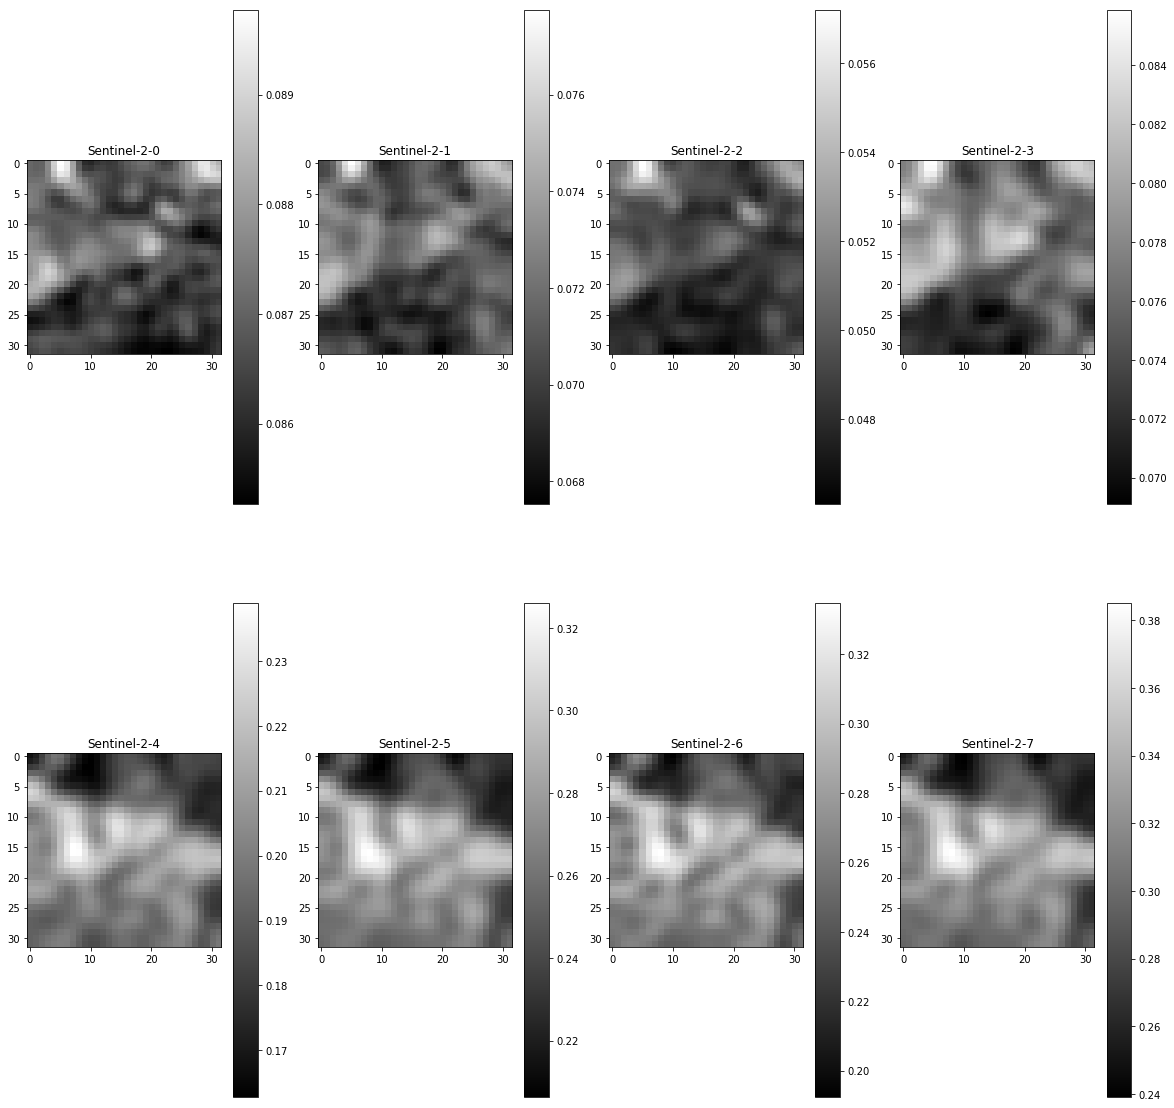

In [2]:
sample = process_imgs[0]

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

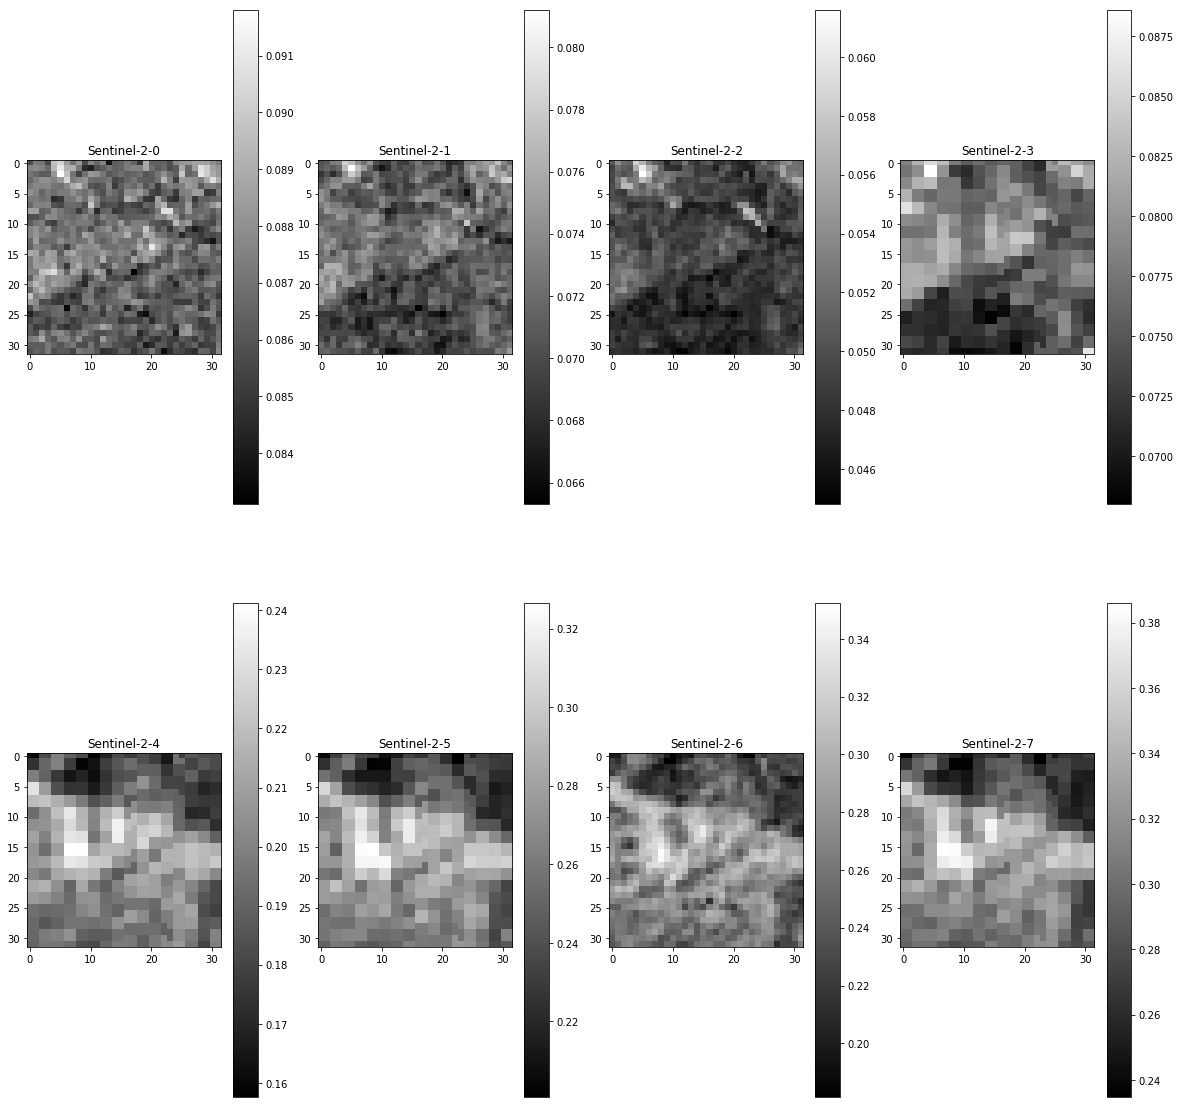

In [3]:
sample_ = imgs[0]

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample_[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

In [4]:
y = data[:,-17:]

np.save('data_shuffle_process_no_label.npy',process_imgs)
np.save('data_shuffle_label',y)

In [5]:
y.shape

(50989, 17)

In [1]:
import numpy as np

imgs = np.load('data_shuffle_process_no_label.npy')
label = np.load('data_shuffle_label.npy')

x = []
for i in range(0,imgs.shape[0]):
    temp = imgs[i].flatten()
    x.append(temp)
x = np.array(x)

print(x.shape)

data = np.hstack((x,label))

data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data_shuffle_process_no_label.npy'

In [2]:
np.save('s2_data_shuffle_GSG.npy',data)

##### 按照之前对训练集的预处理方法对测试集进行预处理

In [1]:
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def GSG(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
    step_0 = cv2.GaussianBlur(img,(5,5),0)
    step_1 = cv2.filter2D(step_0, -1, kernel=kernel)
    output = cv2.GaussianBlur(step_1,(5,5),0)
    return output

filename = 'E:/Alibaba German AI Challenge/origin_DATA/round1_test_a_20181109.h5'
f = h5py.File(filename,'r')
s2 = np.array(f['sen2'])

print('shape of s2 %d'%s2.shape)

process_imgs = np.zeros(s2.shape)

for i in range(s2.shape[0]):
    temp = s2[i]
    for j in range(10):
        img = temp[:,:,j].reshape((32,32))
        pro_img = GSG(img)
        process_imgs[i,:,:,j] = pro_img
        
process_imgs.shape

shape of s2 %d (4838, 32, 32, 10)


(4838, 32, 32, 10)

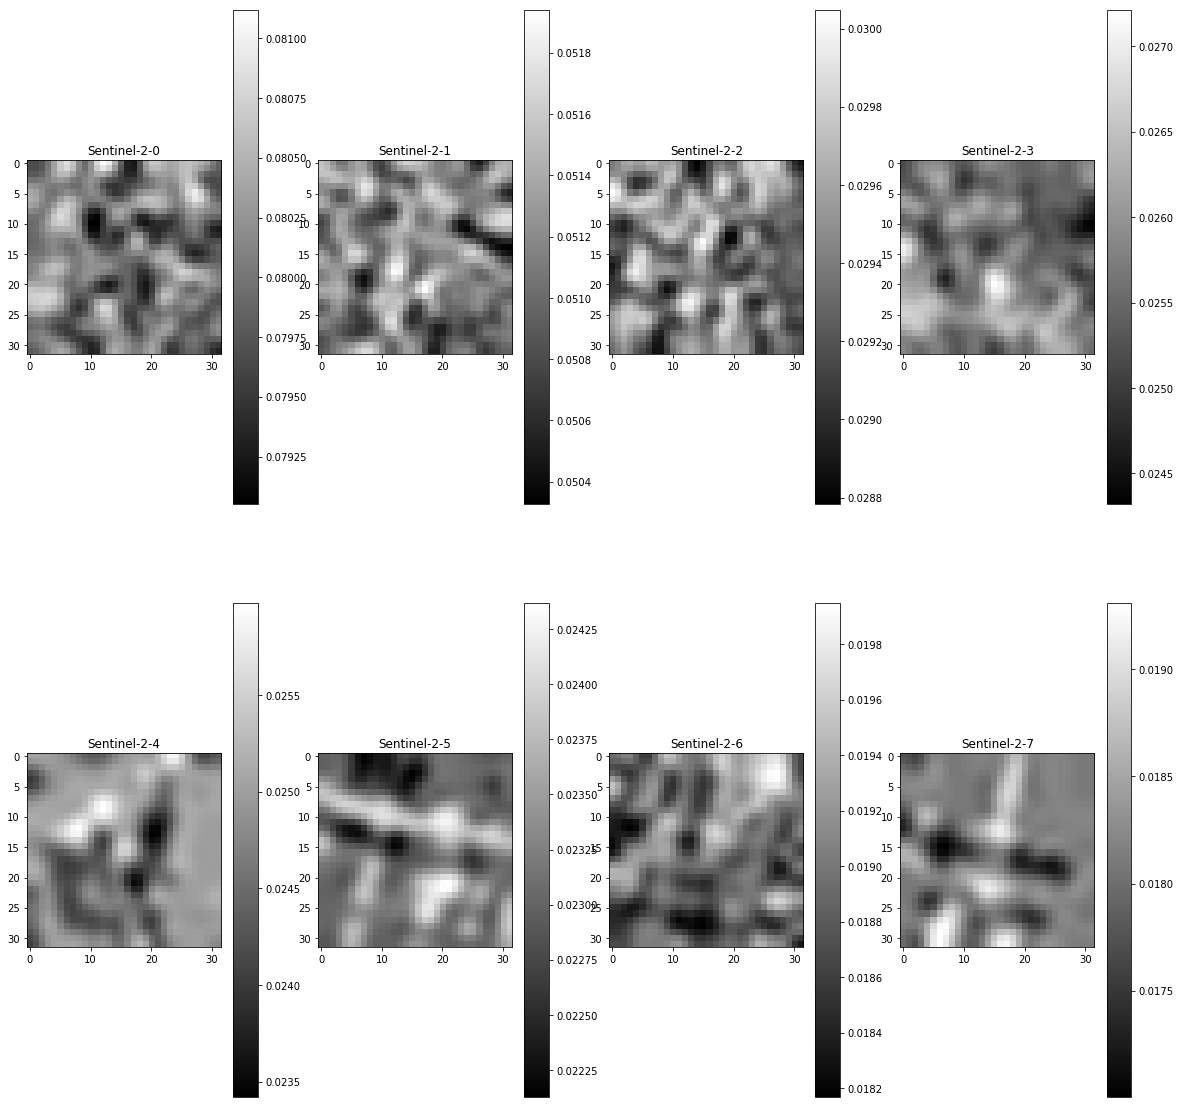

In [2]:
sample = process_imgs[0]

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

In [4]:
x = []
for i in range(0,s2.shape[0]):
    temp = s2[i].flatten()
    x.append(temp)
x = np.array(x)

print(x.shape)

(4838, 10240)


In [5]:
np.save('test_s2_gsg.npy',x)

##### GS(高斯滤波加锐化)进行预处理形成数据集

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def GS(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
    step_0 = cv2.GaussianBlur(img,(5,5),0)
    output = cv2.filter2D(step_0, -1, kernel=kernel)
    return output

data = np.load('E:/Alibaba German AI Challenge/data_process/s2/s2_data_shuffle.npy')
imgs = data[:,:-17].reshape((-1,32,32,10))

process_imgs = np.zeros(imgs.shape)

for i in range(imgs.shape[0]):
    temp = imgs[i]
    for j in range(10):
        img = temp[:,:,j].reshape((32,32))
        pro_img = GS(img)
        process_imgs[i,:,:,j] = pro_img
        
process_imgs.shape

(50989, 32, 32, 10)

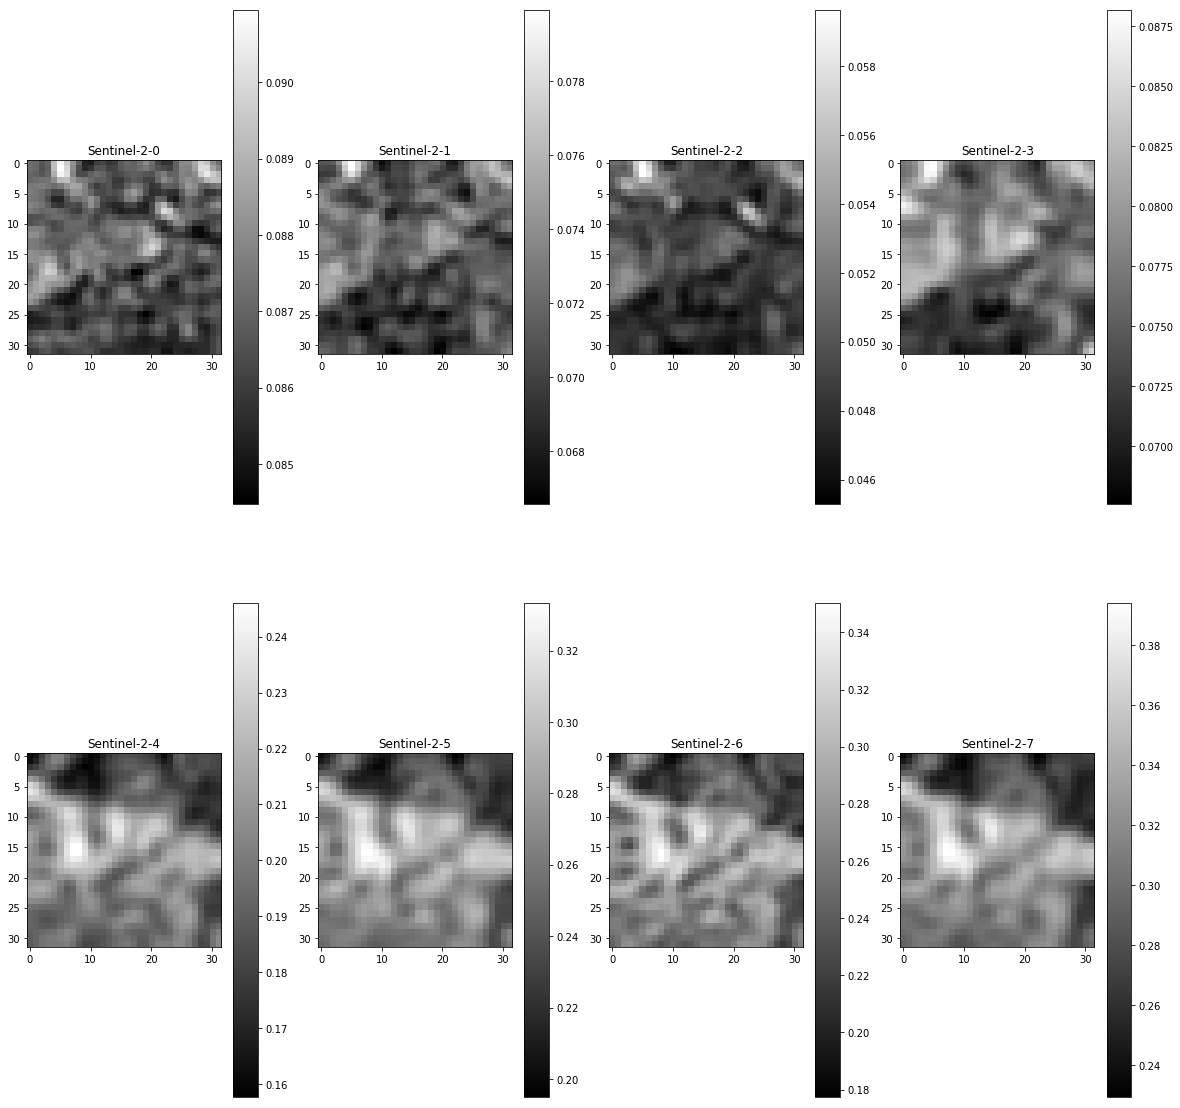

In [2]:
sample = process_imgs[0]

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

In [3]:
label = data[:,-17:]

x = []
for i in range(0,imgs.shape[0]):
    temp = imgs[i].flatten()
    x.append(temp)
x = np.array(x)

print(x.shape)

data = np.hstack((x,label))

data.shape

(50989, 10240)


(50989, 10257)

In [4]:
np.save('s2_data_shuffle_GS.npy',data)

##### GS处理测试集

In [3]:
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def GS(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
    step_0 = cv2.GaussianBlur(img,(5,5),0)
    output = cv2.filter2D(step_0, -1, kernel=kernel)
    return output

filename = 'E:/Alibaba German AI Challenge/origin_DATA/round1_test_a_20181109.h5'
f = h5py.File(filename,'r')
s2 = np.array(f['sen2'])

print('shape of s2 is',s2.shape[0])

process_imgs = np.zeros(s2.shape)

for i in range(s2.shape[0]):
    temp = s2[i]
    for j in range(10):
        img = temp[:,:,j].reshape((32,32))
        pro_img = GS(img)
        process_imgs[i,:,:,j] = pro_img
        
process_imgs.shape

shape of s2 is 4838


(4838, 32, 32, 10)

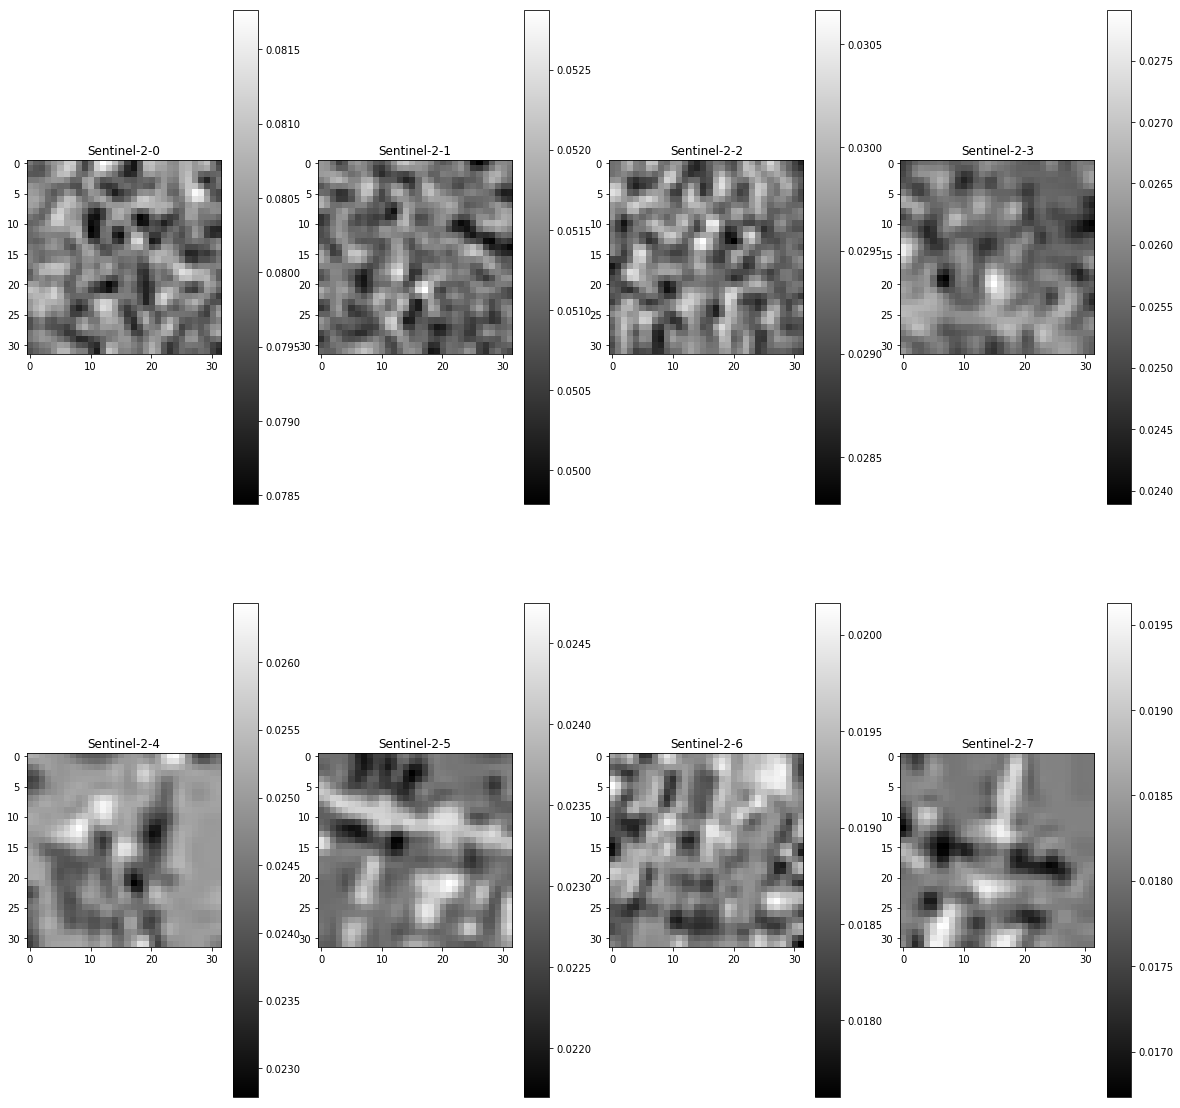

In [4]:
sample = process_imgs[0]

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

In [5]:
x = []
for i in range(0,s2.shape[0]):
    temp = s2[i].flatten()
    x.append(temp)
x = np.array(x)

print(x.shape)

(4838, 10240)


In [6]:
np.save('test_s2_gs.npy',x)

#### 制作只有s2通道的test数据

In [2]:
import h5py
import numpy as np
filename = 'E:/Alibaba German AI Challenge/origin_DATA/round1_test_a_20181109.h5'
f = h5py.File(filename,'r')
test_s2 = f['sen2']

test = []
for i in range(0,test_s2.shape[0]):
    temp2 = test_s2[i].flatten()
    test.append(temp2)
test = np.array(test)

test.shape

(4838, 10240)

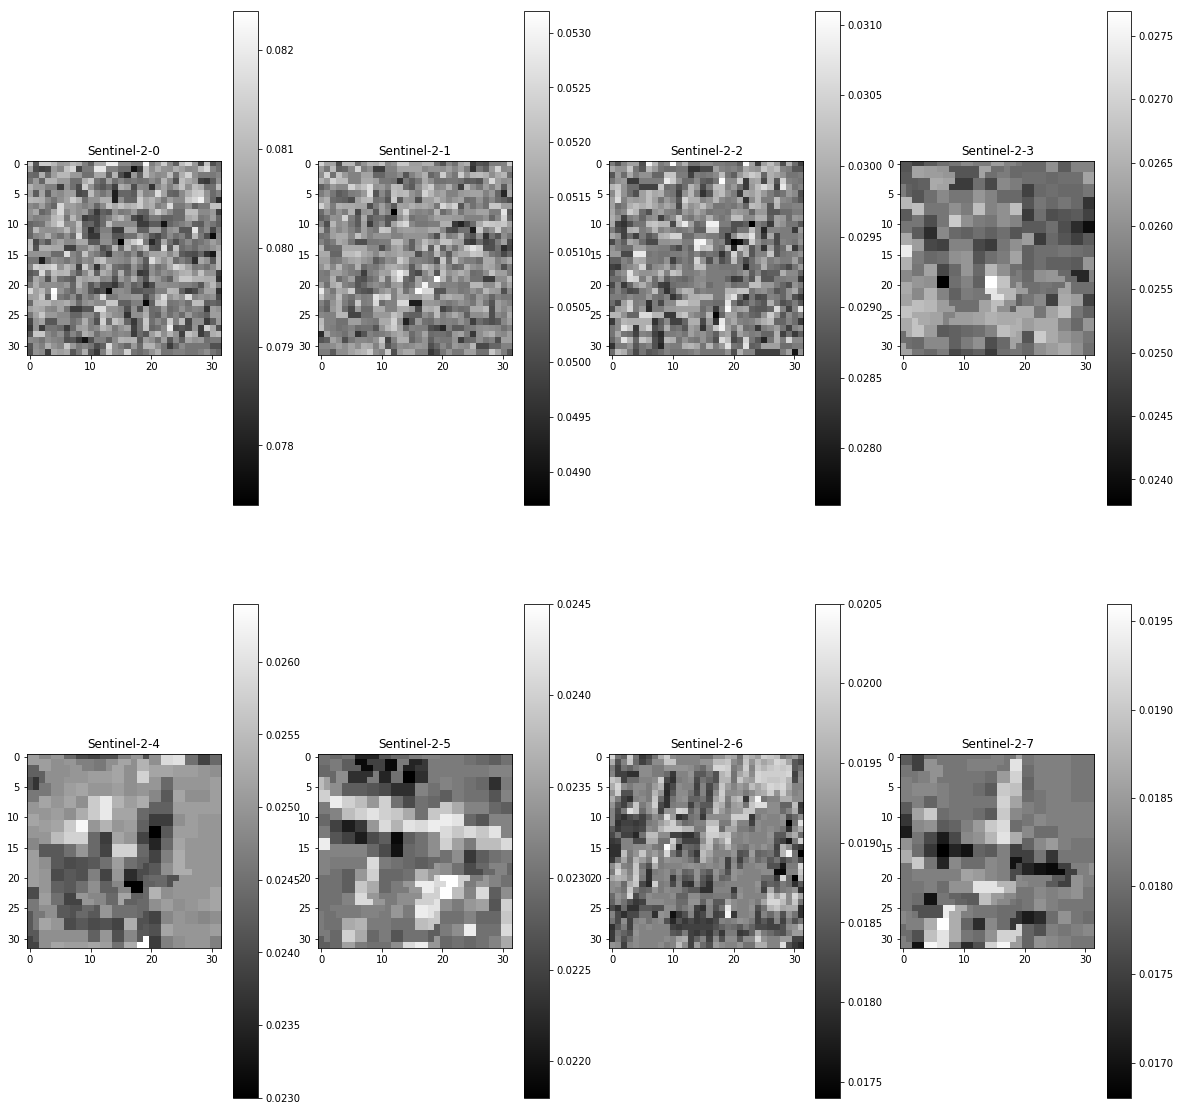

In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
sample = test[0]
sample = sample.reshape((32,32,10))

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-2-%d'%i)
plt.show()
sample_ = sample[:,:,7].reshape((32,32))

#### 探索test数据集中的s1

In [1]:
import h5py
import numpy as np
filename = 'E:/Alibaba German AI Challenge/origin_DATA/round1_test_a_20181109.h5'
f = h5py.File(filename,'r')
test_s1 = np.array(f['sen1'])

test_s1.shape

(4838, 32, 32, 8)

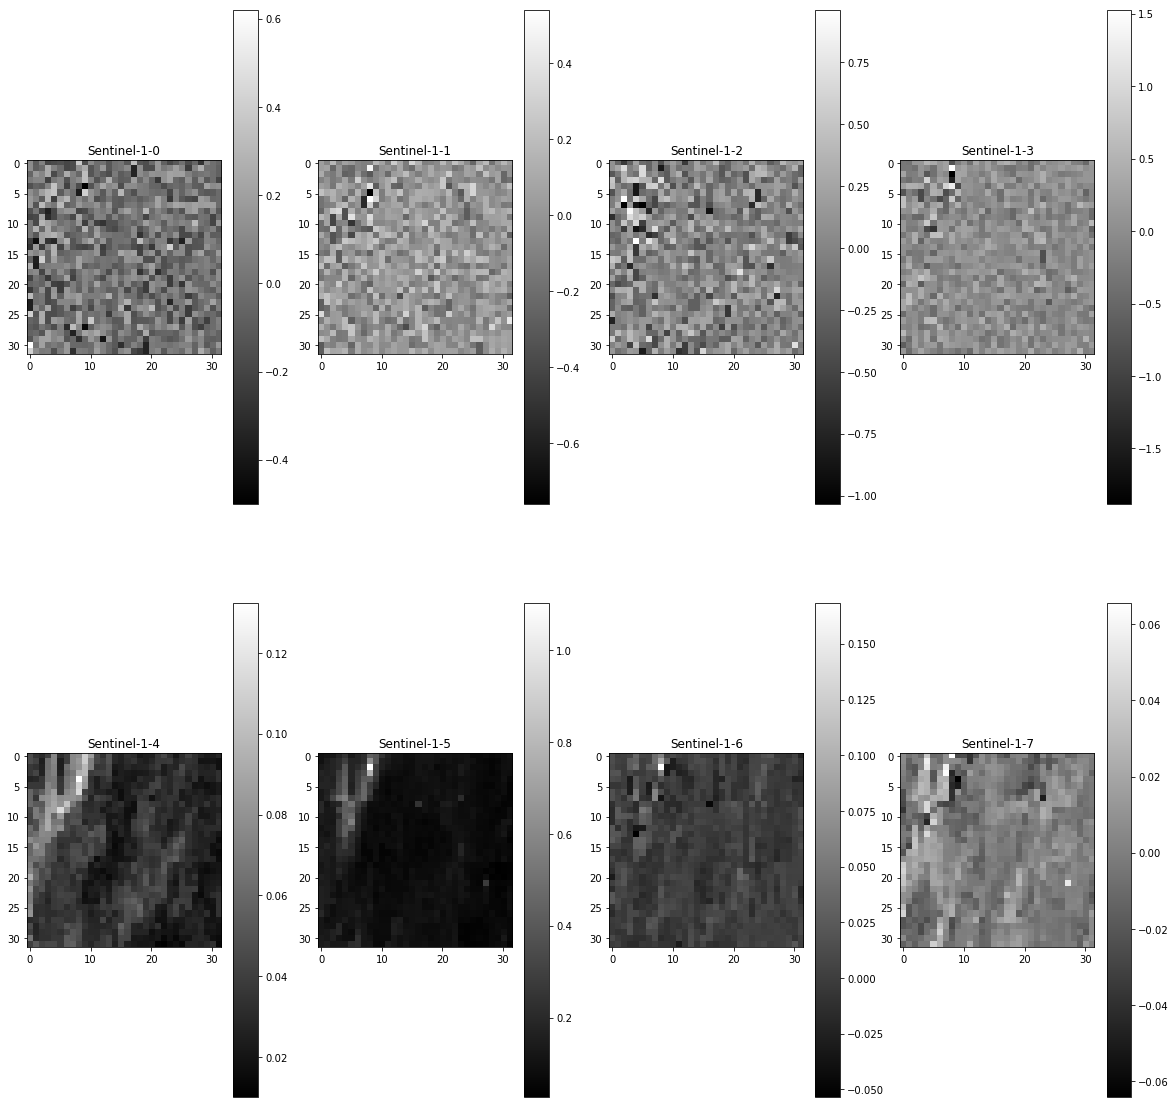

In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

sample = test_s1[111]
#sample = sample.reshape((32,32,10))

plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(241+i)
    plt.imshow(sample[:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.colorbar()
    plt.title('Sentinel-1-%d'%i)
plt.show()

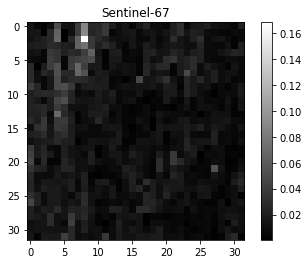

In [9]:
s1_6 = sample[:,:,6]
s1_7 = sample[:,:,7]

s1_67 = np.zeros(s1_6.shape)

for i in range(s1_6.shape[0]):
    for j in range(s1_6.shape[1]):
        s1_67[i][j] = np.sqrt(s1_6[i][j]*s1_6[i][j] + s1_7[i][j]*s1_7[i][j])
        
plt.imshow(s1_67,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-67')
plt.show()

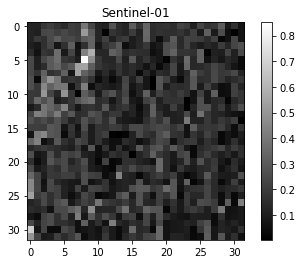

In [10]:
s1_0 = sample[:,:,0]
s1_1 = sample[:,:,1]

s1_01 = np.zeros(s1_6.shape)

for i in range(s1_6.shape[0]):
    for j in range(s1_6.shape[1]):
        s1_01[i][j] = np.sqrt(s1_0[i][j]*s1_0[i][j] + s1_1[i][j]*s1_1[i][j])
        
plt.imshow(s1_01,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-01')
plt.show()   

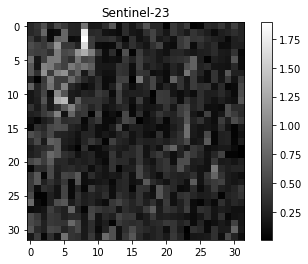

In [11]:
import math
s1_2 = sample[:,:,2]
s1_3 = sample[:,:,3]

s1_23 = np.zeros(s1_6.shape)

for i in range(s1_6.shape[0]):
    for j in range(s1_6.shape[1]):
        s1_23[i][j] = np.sqrt(s1_2[i][j]*s1_2[i][j] + s1_3[i][j]*s1_3[i][j])
        
plt.imshow(s1_23,cmap=plt.cm.get_cmap('gray'))
plt.colorbar()
plt.title('Sentinel-23')
plt.show()   

In [17]:
def comb_img(img_a,img_b):
    output = np.zeros(img_a.shape)
    for i in range(img_a.shape[0]):
        for j in range(img_a.shape[1]):
            output[i][j] = np.sqrt(img_a[i][j]*img_a[i][j] + img_b[i][j]*img_b[i][j])
    return output

In [18]:
def comb(data,a,b):
    output = np.zeros((data.shape[0],32,32))
    for i in range(data.shape[0]):
        sample = data[i]
        s_a = sample[:,:,a]
        s_b = sample[:,:,b]
        output[i] = comb_img(s_a,s_b)
        
    return output

In [19]:
result = comb(test_s1,6,7)
result.shape

(4838, 32, 32)